<a href="https://colab.research.google.com/github/Gorli-Jahanavi/titanic_survival_prediction/blob/main/titanic_survival.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Decision Tree Accuracy: 1.00
Random Forest Accuracy: 1.00


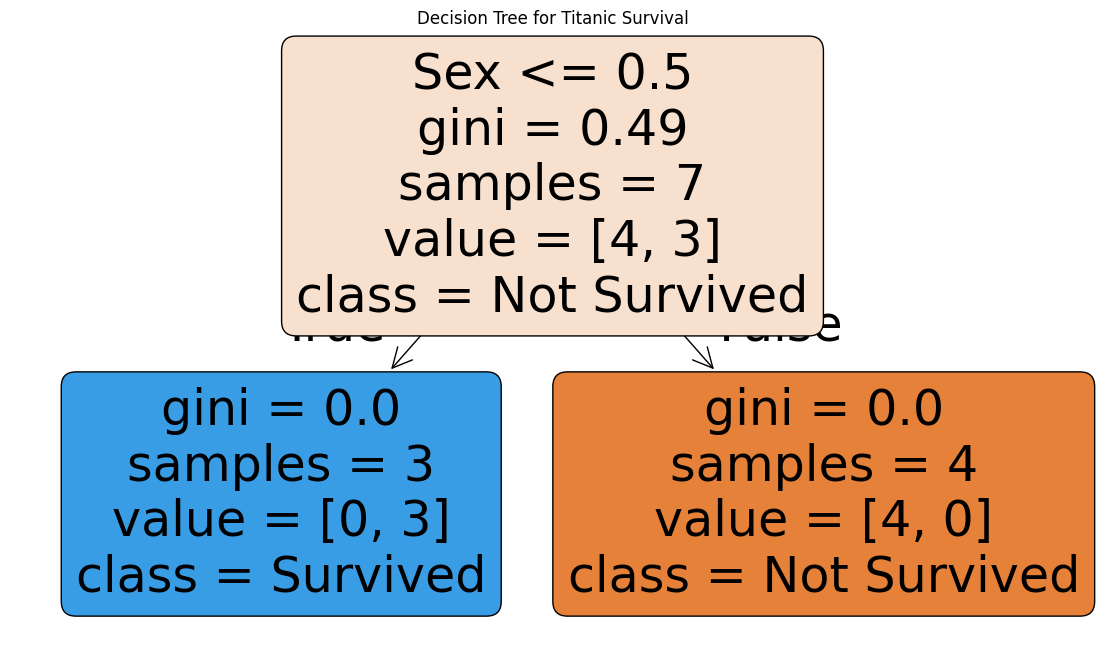

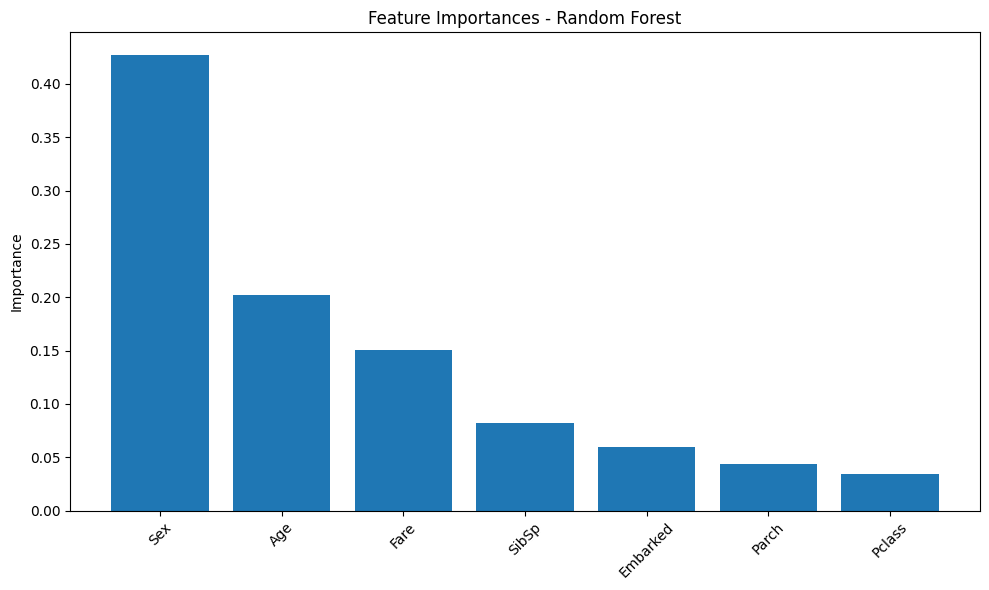

In [1]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

# Step 1: Create the dataset
data = {
    'Pclass': [3,1,3,1,3,2,1,3,2,1],
    'Sex': ['male','female','female','male','female','male','female','male','female','male'],
    'Age': [22,38,26,35,27,30,19,40,23,50],
    'SibSp': [1,1,0,1,0,0,1,0,0,1],
    'Parch': [0,0,0,0,2,0,0,0,1,0],
    'Fare': [7.25,71.28,7.92,53.10,11.13,13.00,30.00,8.05,12.50,35.00],
    'Embarked': ['S','C','S','S','S','Q','C','S','C','S'],
    'Survived': [0,1,1,0,1,0,1,0,1,0]
}

df = pd.DataFrame(data)

# Step 2: Encode categorical columns
le_sex = LabelEncoder()
le_embarked = LabelEncoder()

df['Sex'] = le_sex.fit_transform(df['Sex'])       # male=1, female=0
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])  # C=0, Q=1, S=2

# Step 3: Define features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X = df[features]
y = df['Survived']

# Step 4: Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Step 5: Train Decision Tree model
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)

# Step 6: Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Step 7: Predict and evaluate Decision Tree
dt_pred = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_pred)

# Step 8: Predict and evaluate Random Forest
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)

print(f"Decision Tree Accuracy: {dt_accuracy:.2f}")
print(f"Random Forest Accuracy: {rf_accuracy:.2f}")

# ----- Plot Decision Tree -----
plt.figure(figsize=(14,8))
plot_tree(dt_model, feature_names=features, class_names=['Not Survived', 'Survived'], filled=True, rounded=True)
plt.title("Decision Tree for Titanic Survival")
plt.show()

# ----- Plot Random Forest Feature Importances -----
importances = rf_model.feature_importances_
indices = importances.argsort()[::-1]

plt.figure(figsize=(10,6))
plt.title("Feature Importances - Random Forest")
plt.bar(range(len(features)), importances[indices], align='center')
plt.xticks(range(len(features)), [features[i] for i in indices], rotation=45)
plt.ylabel("Importance")
plt.tight_layout()
plt.show()
